In [6]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt #same as import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

import xgboost as xgb
from sklearn.preprocessing import StandardScaler

In [15]:
def data_preprocess_red():
    df = pd.read_csv('winequality-red.csv',sep=';')
    df.iloc[:, :-1] = df.iloc[:, :-1].astype(float)  
    #df.quality = df.quality.map({3:0,4:1,5:2,6:3,7:4,8:5})
    print(df.quality.unique())
    df.drop_duplicates(inplace = True)
    df.dropna(inplace = True)
    df.drop(columns=['density'])
    return df.iloc[:,:-1].values, df.iloc[:,-1].values

data_preprocess_red()

[5 6 7 4 8 3]


(array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
        [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
        [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
        ...,
        [ 5.9  ,  0.55 ,  0.1  , ...,  3.52 ,  0.76 , 11.2  ],
        [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
        [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]]),
 array([5, 5, 5, ..., 6, 5, 6]))

In [16]:
#def data_preprocess(dataset):
#    df = pd.read_csv(dataset,sep=';')
#    df.iloc[:, :-1] = df.iloc[:, :-1].astype(float)    
#    return df.iloc[:,:-1].values, df.iloc[:,-1].values

[5 6 7 4 8 3]


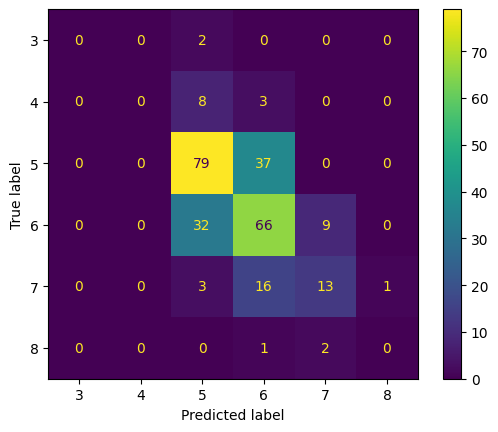

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.64      0.68      0.66       116
           6       0.54      0.62      0.57       107
           7       0.54      0.39      0.46        33
           8       0.00      0.00      0.00         3

    accuracy                           0.58       272
   macro avg       0.29      0.28      0.28       272
weighted avg       0.55      0.58      0.56       272



In [19]:
def datasplit(df):
    X, y = df

    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

    model = RandomForestClassifier(n_estimators=100, random_state=1, class_weight='balanced')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    rep = classification_report(y_test, y_pred, zero_division=0)  # Replace undefined precision with 1

    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()

    print(rep)
    return

datasplit(data_preprocess_red())
    


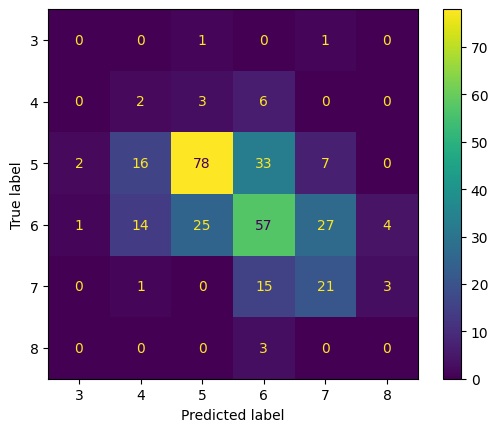

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.06      0.18      0.09        11
           5       0.73      0.57      0.64       136
           6       0.50      0.45      0.47       128
           7       0.38      0.53      0.44        40
           8       0.00      0.00      0.00         3

    accuracy                           0.49       320
   macro avg       0.28      0.29      0.27       320
weighted avg       0.56      0.49      0.52       320



In [32]:
def datasplit_with_augmentation(df):
    X, y = df

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

    # SMOTE for oversampling minority classes
    smote = SMOTE(random_state=1)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Add random noise for robustness
    noise_level = 0.01
    X_train_smote_noisy = X_train_smote + noise_level * np.random.normal(size=X_train_smote.shape)

    # Train decision tree
    model = DecisionTreeClassifier(max_depth=100, min_samples_split=5, random_state=1, class_weight='balanced')
    model.fit(X_train_smote_noisy, y_train_smote)
    y_pred = model.predict(X_test)

    # Classification report and confusion matrix
    rep = classification_report(y_test, y_pred, zero_division=1)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()

    print(rep)
    return

datasplit_with_augmentation(data_preprocess('winequality-red.csv'))

[2 3 4 1 5 0]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       1.00      0.00      0.00        11
           2       0.67      0.73      0.70       136
           3       0.54      0.65      0.59       128
           4       0.63      0.30      0.41        40
           5       1.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.81      0.28      0.28       320
weighted avg       0.63      0.61      0.58       320



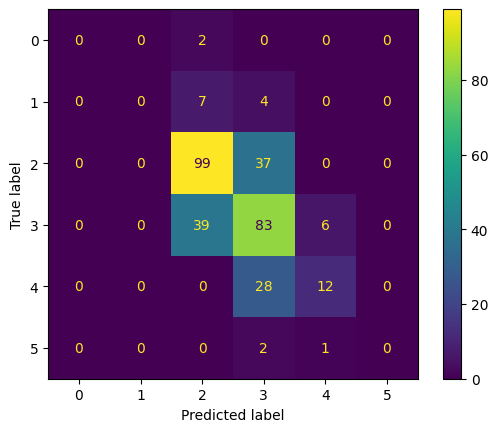

/home/miguel/datascienceenv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=11, ...)

In [48]:
def xgboost_classifier(df):
    # Split data into features and target
    X, y = df

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

    # XGBoost hyperparameters
    params = {
        'objective': 'multi:softmax',  # Multi-class classification
        'num_class': 11,  # Full range of classes (0 to 10)
        'learning_rate': 0.1,
        'max_depth': 6,
        'alpha': 10,  # L1 regularization
        'n_estimators': 100,
        'random_state': 1
    }

    # Train the model
    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)

    # Classification report
    report = classification_report(y_test, y_pred, zero_division=1)
    print(report)

    # Display confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

    return model
    

xgboost_classifier(data_preprocess_red())